# On the acceptance kernel normalization constant

In [4]:
import pyabc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import copy
import logging
import pickle

df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)


std = 0.5
noise_model = np.random.randn
n_t = 10

def model(p):
    return {'y0': p['p0']}

def model_noisy(p):
    return {'y0': model(p)['y0'] + std * noise_model(n_t)}

limits = {'p0': (0, 5)}
prior = pyabc.Distribution(**{key: pyabc.RV('uniform', a, b-a) 
                              for key, (a,b) in limits.items()})
p_true = {'p0': 2.5}

limits_uvar = copy.deepcopy(limits)
limits_uvar['std'] = (0.1, 2)


data = None

def load_data():
    try:
        _data = pickle.load(open("data.dat", "rb"))
    except:
        _data = {'y0': 2.5 + std * noise_model(n_t)}
        pickle.dump(_data, open("data.dat", "wb"))
    return _data

data = load_data()

In [2]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = pyabc.IndependentNormalKernel(var=np.array(std**2), pdf_max=-17)

print(kernel(data, data))

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor, eps=temperature, population_size=1000)
h_incorrect = abc.new("sqlite:///h_incorrect.db", data)
h_incorrect = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 12:34:43.176375, end_time=None)>
DEBUG:Acceptor:pdf_norm=-1.7000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.


-0.22579135264472738


INFO:ABC:t: 0, eps: 6.589153995545068.
DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0963e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1744e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0523e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0622e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0660e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0438e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1518e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2884e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4470e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1858e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0308e+01 > c=-1

DEBUG:Acceptor:Encountered pd=-1.3669e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1151e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0409e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3248e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0871e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6863e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0305e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2440e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2062e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2516e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0307e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0460e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.3258e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6498e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1861e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0851e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2595e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1744e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0703e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2480e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2422e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5385e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0609e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6212e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0775e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4193e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6027e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0502e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0275e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0305e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3901e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0449e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4405e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3858e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1440e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3398e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2507e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4142e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0468e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3021e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0655e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3505e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1610e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0967e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0297e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3675e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6319e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0355e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.5074e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4123e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3126e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5250e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5171e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0287e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3175e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6940e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0277e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0279e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0416e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0544e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1957e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0366e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0733e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1580e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4459e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0805e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0332e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4953e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3332e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1793e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2086e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1886e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.3848e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4852e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0591e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1255e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4247e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3431e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6715e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5610e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0523e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3058e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2893e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0433e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.3363e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3911e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1223e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0322e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1745e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1178e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0384e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6420e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0296e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3323e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0298e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3074e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2556e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1256e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5553e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5849e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1466e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2020e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0296e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1012e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0526e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5016e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0356e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0504e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0929e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5982e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1501e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0306e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0895e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1271e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2175e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0637e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3602e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1438e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4348e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6018e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.4183e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3531e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2745e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1314e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2510e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1828e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1737e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4665e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4605e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0356e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2903e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3669e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0568e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6230e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4970e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2663e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4315e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0600e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1894e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0396e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3576e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4566e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2169e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2878e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.4793e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4171e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1832e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1695e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6280e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0505e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5530e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1394e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0322e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0967e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3878e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0966e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.5734e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1836e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5622e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0538e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4903e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2971e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6900e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5269e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0618e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5405e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5391e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2584e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0942e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1333e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0917e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3056e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0421e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4039e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0814e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2774e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0710e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1554e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4345e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.4086e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0447e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1690e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3749e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6849e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2257e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0672e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5530e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0611e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1514e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1017e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.5342e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2023e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2111e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0421e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.6580e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0616e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0531e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0416e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1028e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1138e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1903e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0304e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3003e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0911e+01 > c=-1.7000e+01, thus weight=1.0000e+00.
DEBU

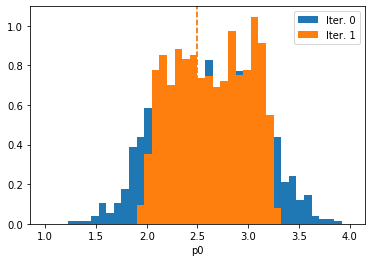

In [3]:
_, ax = plt.subplots()
for t in range(0, h_incorrect.max_t + 1):
    pyabc.visualization.plot_histogram_1d(
        h_incorrect, t=t, x="p0", xmin=1, xmax=4, ax=ax,
        refval=p_true, label=f"Iter. {t}", bins=40)
plt.legend()

In [4]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=True)
temperature = pyabc.Temperature()
distance = lambda x, x0: np.sum((x['y0']-x0['y0'])**2)
kernel = pyabc.IndependentNormalKernel(var=np.array(std**2), pdf_max=-17)

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor, eps=temperature, population_size=1000)
h = abc.new("sqlite:///h.db", data)
h = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 12:35:04.634638, end_time=None)>
DEBUG:Acceptor:pdf_norm=-1.7000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 5.692009298718009.
DEBUG:Acceptor:Encountered pd=-1.0344e+01 > c=-1.7000e+01, thus weight=3.2201e+00.
DEBUG:Acceptor:Encountered pd=-1.0340e+01 > c=-1.7000e+01, thus weight=3.2222e+00.
DEBUG:Acceptor:Encountered pd=-1.6737e+01 > c=-1.7000e+01, thus weight=1.0473e+00.
DEBUG:Acceptor:Encountered pd=-1.5265e+01 > c=-1.7000e+01, thus weight=1.3563e+00.
DEBUG:Acceptor:Encountered pd=-1.1177e+01 > c=-1.7000e+01, thus weight=2.7813e+00.
DEBUG:Acceptor:Encountered pd=-1.5852e+01 > c=-1.7000e+01, thus weight=1.2235e+00.
DEBUG:Acceptor:Encountered pd=-1.5712e+01 > c=-1.7000e+01, thus weight=1.2540e+00.
DEBUG:Acceptor:Encountered pd=-1.2148e+01 > c=-1.7000e+01, thus weight=2.3454e+00.
DEBUG:Acceptor:Encountered pd=-1.2115e+01 > c=-1.7000e+01, thus weight=2.3590e+00.
DEBUG:Acceptor:Encountered pd=-1.2944e+01

DEBUG:Acceptor:Encountered pd=-1.3407e+01 > c=-1.7000e+01, thus weight=1.8798e+00.
DEBUG:Acceptor:Encountered pd=-1.5001e+01 > c=-1.7000e+01, thus weight=1.4208e+00.
DEBUG:Acceptor:Encountered pd=-1.4688e+01 > c=-1.7000e+01, thus weight=1.5010e+00.
DEBUG:Acceptor:Encountered pd=-1.4824e+01 > c=-1.7000e+01, thus weight=1.4655e+00.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.7000e+01, thus weight=3.2541e+00.
DEBUG:Acceptor:Encountered pd=-1.0901e+01 > c=-1.7000e+01, thus weight=2.9196e+00.
DEBUG:Acceptor:Encountered pd=-1.2214e+01 > c=-1.7000e+01, thus weight=2.3184e+00.
DEBUG:Acceptor:Encountered pd=-1.3355e+01 > c=-1.7000e+01, thus weight=1.8972e+00.
DEBUG:Acceptor:Encountered pd=-1.3355e+01 > c=-1.7000e+01, thus weight=1.8971e+00.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.7000e+01, thus weight=3.2541e+00.
DEBUG:Acceptor:Encountered pd=-1.6841e+01 > c=-1.7000e+01, thus weight=1.0284e+00.
DEBUG:Acceptor:Encountered pd=-1.5350e+01 > c=-1.7000e+01, thus weight=1.3362e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1454e+01 > c=-1.7000e+01, thus weight=2.6495e+00.
DEBUG:Acceptor:Encountered pd=-1.0891e+01 > c=-1.7000e+01, thus weight=2.9250e+00.
DEBUG:Acceptor:Encountered pd=-1.2384e+01 > c=-1.7000e+01, thus weight=2.2499e+00.
DEBUG:Acceptor:Encountered pd=-1.1848e+01 > c=-1.7000e+01, thus weight=2.4723e+00.
DEBUG:Acceptor:Encountered pd=-1.1258e+01 > c=-1.7000e+01, thus weight=2.7421e+00.
DEBUG:Acceptor:Encountered pd=-1.3601e+01 > c=-1.7000e+01, thus weight=1.8170e+00.
DEBUG:Acceptor:Encountered pd=-1.1439e+01 > c=-1.7000e+01, thus weight=2.6566e+00.
DEBUG:Acceptor:Encountered pd=-1.1487e+01 > c=-1.7000e+01, thus weight=2.6343e+00.
DEBUG:Acceptor:Encountered pd=-1.1283e+01 > c=-1.7000e+01, thus weight=2.7300e+00.
DEBUG:Acceptor:Encountered pd=-1.4404e+01 > c=-1.7000e+01, thus weight=1.5778e+00.
DEBUG:Acceptor:Encountered pd=-1.0335e+01 > c=-1.7000e+01, thus weight=3.2251e+00.
DEBUG:Acceptor:Encountered pd=-1.3972e+01 > c=-1.7000e+01, thus weight=1.7022e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0440e+01 > c=-1.7000e+01, thus weight=3.1659e+00.
DEBUG:Acceptor:Encountered pd=-1.2805e+01 > c=-1.7000e+01, thus weight=2.0896e+00.
DEBUG:Acceptor:Encountered pd=-1.6298e+01 > c=-1.7000e+01, thus weight=1.1313e+00.
DEBUG:Acceptor:Encountered pd=-1.0905e+01 > c=-1.7000e+01, thus weight=2.9176e+00.
DEBUG:Acceptor:Encountered pd=-1.2331e+01 > c=-1.7000e+01, thus weight=2.2711e+00.
DEBUG:Acceptor:Encountered pd=-1.0472e+01 > c=-1.7000e+01, thus weight=3.1485e+00.
DEBUG:Acceptor:Encountered pd=-1.6087e+01 > c=-1.7000e+01, thus weight=1.1740e+00.
DEBUG:Acceptor:Encountered pd=-1.1282e+01 > c=-1.7000e+01, thus weight=2.7307e+00.
DEBUG:Acceptor:Encountered pd=-1.2983e+01 > c=-1.7000e+01, thus weight=2.0254e+00.
DEBUG:Acceptor:Encountered pd=-1.1435e+01 > c=-1.7000e+01, thus weight=2.6581e+00.
DEBUG:Acceptor:Encountered pd=-1.0566e+01 > c=-1.7000e+01, thus weight=3.0967e+00.
DEBUG:Acceptor:Encountered pd=-1.0762e+01 > c=-1.7000e+01, thus weight=2.9922e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0289e+01 > c=-1.7000e+01, thus weight=3.2511e+00.
DEBUG:Acceptor:Encountered pd=-1.1543e+01 > c=-1.7000e+01, thus weight=2.6082e+00.
DEBUG:Acceptor:Encountered pd=-1.1200e+01 > c=-1.7000e+01, thus weight=2.7702e+00.
DEBUG:Acceptor:Encountered pd=-1.0377e+01 > c=-1.7000e+01, thus weight=3.2013e+00.
DEBUG:Acceptor:Encountered pd=-1.6823e+01 > c=-1.7000e+01, thus weight=1.0316e+00.
DEBUG:Acceptor:Encountered pd=-1.0525e+01 > c=-1.7000e+01, thus weight=3.1193e+00.
DEBUG:Acceptor:Encountered pd=-1.0549e+01 > c=-1.7000e+01, thus weight=3.1060e+00.
DEBUG:Acceptor:Encountered pd=-1.0570e+01 > c=-1.7000e+01, thus weight=3.0948e+00.
DEBUG:Acceptor:Encountered pd=-1.0677e+01 > c=-1.7000e+01, thus weight=3.0371e+00.
DEBUG:Acceptor:Encountered pd=-1.1420e+01 > c=-1.7000e+01, thus weight=2.6655e+00.
DEBUG:Acceptor:Encountered pd=-1.1307e+01 > c=-1.7000e+01, thus weight=2.7188e+00.
DEBUG:Acceptor:Encountered pd=-1.3783e+01 > c=-1.7000e+01, thus weight=1.7597e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.6049e+01 > c=-1.7000e+01, thus weight=1.1819e+00.
DEBUG:Acceptor:Encountered pd=-1.6595e+01 > c=-1.7000e+01, thus weight=1.0738e+00.
DEBUG:Acceptor:Encountered pd=-1.4310e+01 > c=-1.7000e+01, thus weight=1.6042e+00.
DEBUG:Acceptor:Encountered pd=-1.1708e+01 > c=-1.7000e+01, thus weight=2.5338e+00.
DEBUG:Acceptor:Encountered pd=-1.0287e+01 > c=-1.7000e+01, thus weight=3.2524e+00.
DEBUG:Acceptor:Encountered pd=-1.4480e+01 > c=-1.7000e+01, thus weight=1.5570e+00.
DEBUG:Acceptor:Encountered pd=-1.0746e+01 > c=-1.7000e+01, thus weight=3.0002e+00.
DEBUG:Acceptor:Encountered pd=-1.5488e+01 > c=-1.7000e+01, thus weight=1.3044e+00.
DEBUG:Acceptor:Encountered pd=-1.3875e+01 > c=-1.7000e+01, thus weight=1.7316e+00.
DEBUG:Acceptor:Encountered pd=-1.1266e+01 > c=-1.7000e+01, thus weight=2.7386e+00.
DEBUG:Acceptor:Encountered pd=-1.3902e+01 > c=-1.7000e+01, thus weight=1.7235e+00.
DEBUG:Acceptor:Encountered pd=-1.1271e+01 > c=-1.7000e+01, thus weight=2.7362e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1324e+01 > c=-1.7000e+01, thus weight=2.7106e+00.
DEBUG:Acceptor:Encountered pd=-1.0609e+01 > c=-1.7000e+01, thus weight=3.0732e+00.
DEBUG:Acceptor:Encountered pd=-1.3431e+01 > c=-1.7000e+01, thus weight=1.8719e+00.
DEBUG:Acceptor:Encountered pd=-1.2423e+01 > c=-1.7000e+01, thus weight=2.2346e+00.
DEBUG:Acceptor:Encountered pd=-1.0497e+01 > c=-1.7000e+01, thus weight=3.1343e+00.
DEBUG:Acceptor:Encountered pd=-1.4392e+01 > c=-1.7000e+01, thus weight=1.5811e+00.
DEBUG:Acceptor:Encountered pd=-1.0627e+01 > c=-1.7000e+01, thus weight=3.0637e+00.
DEBUG:Acceptor:Encountered pd=-1.0358e+01 > c=-1.7000e+01, thus weight=3.2118e+00.
DEBUG:Acceptor:Encountered pd=-1.5790e+01 > c=-1.7000e+01, thus weight=1.2369e+00.
DEBUG:Acceptor:Encountered pd=-1.2806e+01 > c=-1.7000e+01, thus weight=2.0891e+00.
DEBUG:Acceptor:Encountered pd=-1.0646e+01 > c=-1.7000e+01, thus weight=3.0535e+00.
DEBUG:Acceptor:Encountered pd=-1.2162e+01 > c=-1.7000e+01, thus weight=2.3395e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1574e+01 > c=-1.7000e+01, thus weight=2.5939e+00.
DEBUG:Acceptor:Encountered pd=-1.2399e+01 > c=-1.7000e+01, thus weight=2.2440e+00.
DEBUG:Acceptor:Encountered pd=-1.1052e+01 > c=-1.7000e+01, thus weight=2.8434e+00.
DEBUG:Acceptor:Encountered pd=-1.5825e+01 > c=-1.7000e+01, thus weight=1.2294e+00.
DEBUG:Acceptor:Encountered pd=-1.5581e+01 > c=-1.7000e+01, thus weight=1.2830e+00.
DEBUG:Acceptor:Encountered pd=-1.0430e+01 > c=-1.7000e+01, thus weight=3.1716e+00.
DEBUG:Acceptor:Encountered pd=-1.3483e+01 > c=-1.7000e+01, thus weight=1.8551e+00.
DEBUG:Acceptor:Encountered pd=-1.1057e+01 > c=-1.7000e+01, thus weight=2.8408e+00.
DEBUG:Acceptor:Encountered pd=-1.0576e+01 > c=-1.7000e+01, thus weight=3.0914e+00.
DEBUG:Acceptor:Encountered pd=-1.2708e+01 > c=-1.7000e+01, thus weight=2.1255e+00.
DEBUG:Acceptor:Encountered pd=-1.2470e+01 > c=-1.7000e+01, thus weight=2.2163e+00.
DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.7000e+01, thus weight=3.2588e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0344e+01 > c=-1.7000e+01, thus weight=7.7746e+02.
DEBUG:Acceptor:Encountered pd=-1.6287e+01 > c=-1.7000e+01, thus weight=2.0407e+00.
DEBUG:Acceptor:Encountered pd=-1.2840e+01 > c=-1.7000e+01, thus weight=6.4091e+01.
DEBUG:Acceptor:Encountered pd=-1.3890e+01 > c=-1.7000e+01, thus weight=2.2426e+01.
DEBUG:Acceptor:Encountered pd=-1.2976e+01 > c=-1.7000e+01, thus weight=5.5898e+01.
DEBUG:Acceptor:Encountered pd=-1.1476e+01 > c=-1.7000e+01, thus weight=2.5055e+02.
DEBUG:Acceptor:Encountered pd=-1.0720e+01 > c=-1.7000e+01, thus weight=5.3388e+02.
DEBUG:Acceptor:Encountered pd=-1.1270e+01 > c=-1.7000e+01, thus weight=3.0809e+02.
DEBUG:Acceptor:Encountered pd=-1.0441e+01 > c=-1.7000e+01, thus weight=7.0579e+02.
DEBUG:Acceptor:Encountered pd=-1.0280e+01 > c=-1.7000e+01, thus weight=8.2861e+02.
DEBUG:Acceptor:Encountered pd=-1.1705e+01 > c=-1.7000e+01, thus weight=1.9931e+02.
DEBUG:Acceptor:Encountered pd=-1.0306e+01 > c=-1.7000e+01, thus weight=8.0724e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1256e+01 > c=-1.7000e+01, thus weight=3.1223e+02.
DEBUG:Acceptor:Encountered pd=-1.1677e+01 > c=-1.7000e+01, thus weight=2.0494e+02.
DEBUG:Acceptor:Encountered pd=-1.0280e+01 > c=-1.7000e+01, thus weight=8.2905e+02.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.7000e+01, thus weight=8.2519e+02.
DEBUG:Acceptor:Encountered pd=-1.0971e+01 > c=-1.7000e+01, thus weight=4.1518e+02.
DEBUG:Acceptor:Encountered pd=-1.1114e+01 > c=-1.7000e+01, thus weight=3.5982e+02.
DEBUG:Acceptor:Encountered pd=-1.0524e+01 > c=-1.7000e+01, thus weight=6.4933e+02.
DEBUG:Acceptor:Encountered pd=-1.0783e+01 > c=-1.7000e+01, thus weight=5.0138e+02.
DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.7000e+01, thus weight=8.3208e+02.
DEBUG:Acceptor:Encountered pd=-1.0946e+01 > c=-1.7000e+01, thus weight=4.2580e+02.
DEBUG:Acceptor:Encountered pd=-1.0487e+01 > c=-1.7000e+01, thus weight=6.7418e+02.
DEBUG:Acceptor:Encountered pd=-1.0279e+01 > c=-1.7000e+01, thus weight=8.2948e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1667e+01 > c=-1.7000e+01, thus weight=2.0704e+02.
DEBUG:Acceptor:Encountered pd=-1.0622e+01 > c=-1.7000e+01, thus weight=5.8884e+02.
DEBUG:Acceptor:Encountered pd=-1.0868e+01 > c=-1.7000e+01, thus weight=4.6026e+02.
DEBUG:Acceptor:Encountered pd=-1.4743e+01 > c=-1.7000e+01, thus weight=9.5584e+00.
DEBUG:Acceptor:Encountered pd=-1.0282e+01 > c=-1.7000e+01, thus weight=8.2749e+02.
DEBUG:Acceptor:Encountered pd=-1.0501e+01 > c=-1.7000e+01, thus weight=6.6419e+02.
DEBUG:Acceptor:Encountered pd=-1.5607e+01 > c=-1.7000e+01, thus weight=4.0281e+00.
DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.7000e+01, thus weight=8.3215e+02.
DEBUG:Acceptor:Encountered pd=-1.0732e+01 > c=-1.7000e+01, thus weight=5.2753e+02.
DEBUG:Acceptor:Encountered pd=-1.0646e+01 > c=-1.7000e+01, thus weight=5.7477e+02.
DEBUG:Acceptor:Encountered pd=-1.0844e+01 > c=-1.7000e+01, thus weight=4.7163e+02.
DEBUG:Acceptor:Encountered pd=-1.5680e+01 > c=-1.7000e+01, thus weight=3.7419e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.4314e+01 > c=-1.7000e+01, thus weight=1.4670e+01.
DEBUG:Acceptor:Encountered pd=-1.0300e+01 > c=-1.7000e+01, thus weight=8.1244e+02.
DEBUG:Acceptor:Encountered pd=-1.0542e+01 > c=-1.7000e+01, thus weight=6.3802e+02.
DEBUG:Acceptor:Encountered pd=-1.1233e+01 > c=-1.7000e+01, thus weight=3.1971e+02.
DEBUG:Acceptor:Encountered pd=-1.0911e+01 > c=-1.7000e+01, thus weight=4.4115e+02.
DEBUG:Acceptor:Encountered pd=-1.0577e+01 > c=-1.7000e+01, thus weight=6.1601e+02.
DEBUG:Acceptor:Encountered pd=-1.6635e+01 > c=-1.7000e+01, thus weight=1.4404e+00.
DEBUG:Acceptor:Encountered pd=-1.1225e+01 > c=-1.7000e+01, thus weight=3.2224e+02.
DEBUG:Acceptor:Encountered pd=-1.1624e+01 > c=-1.7000e+01, thus weight=2.1621e+02.
DEBUG:Acceptor:Encountered pd=-1.1333e+01 > c=-1.7000e+01, thus weight=2.8917e+02.
DEBUG:Acceptor:Encountered pd=-1.1844e+01 > c=-1.7000e+01, thus weight=1.7352e+02.
DEBUG:Acceptor:Encountered pd=-1.1338e+01 > c=-1.7000e+01, thus weight=2.8772e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2081e+01 > c=-1.7000e+01, thus weight=1.3685e+02.
DEBUG:Acceptor:Encountered pd=-1.0753e+01 > c=-1.7000e+01, thus weight=5.1634e+02.
DEBUG:Acceptor:Encountered pd=-1.2549e+01 > c=-1.7000e+01, thus weight=8.5742e+01.
DEBUG:Acceptor:Encountered pd=-1.1930e+01 > c=-1.7000e+01, thus weight=1.5923e+02.
DEBUG:Acceptor:Encountered pd=-1.0949e+01 > c=-1.7000e+01, thus weight=4.2473e+02.
DEBUG:Acceptor:Encountered pd=-1.0345e+01 > c=-1.7000e+01, thus weight=7.7631e+02.
DEBUG:Acceptor:Encountered pd=-1.5143e+01 > c=-1.7000e+01, thus weight=6.4069e+00.
DEBUG:Acceptor:Encountered pd=-1.1163e+01 > c=-1.7000e+01, thus weight=3.4281e+02.
DEBUG:Acceptor:Encountered pd=-1.5814e+01 > c=-1.7000e+01, thus weight=3.2746e+00.
DEBUG:Acceptor:Encountered pd=-1.1654e+01 > c=-1.7000e+01, thus weight=2.0983e+02.
DEBUG:Acceptor:Encountered pd=-1.0326e+01 > c=-1.7000e+01, thus weight=7.9129e+02.
DEBUG:Acceptor:Encountered pd=-1.0277e+01 > c=-1.7000e+01, thus weight=8.3159e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.4440e+01 > c=-1.7000e+01, thus weight=1.2939e+01.
DEBUG:Acceptor:Encountered pd=-1.1677e+01 > c=-1.7000e+01, thus weight=2.0508e+02.
DEBUG:Acceptor:Encountered pd=-1.0469e+01 > c=-1.7000e+01, thus weight=6.8623e+02.
DEBUG:Acceptor:Encountered pd=-1.1156e+01 > c=-1.7000e+01, thus weight=3.4516e+02.
DEBUG:Acceptor:Encountered pd=-1.0344e+01 > c=-1.7000e+01, thus weight=7.7730e+02.
DEBUG:Acceptor:Encountered pd=-1.0605e+01 > c=-1.7000e+01, thus weight=5.9873e+02.
DEBUG:Acceptor:Encountered pd=-1.0866e+01 > c=-1.7000e+01, thus weight=4.6113e+02.
DEBUG:Acceptor:Encountered pd=-1.3087e+01 > c=-1.7000e+01, thus weight=5.0057e+01.
DEBUG:Acceptor:Encountered pd=-1.0648e+01 > c=-1.7000e+01, thus weight=5.7368e+02.
DEBUG:Acceptor:Encountered pd=-1.0353e+01 > c=-1.7000e+01, thus weight=7.7013e+02.
DEBUG:Acceptor:Encountered pd=-1.0384e+01 > c=-1.7000e+01, thus weight=7.4721e+02.
DEBUG:Acceptor:Encountered pd=-1.0655e+01 > c=-1.7000e+01, thus weight=5.6954e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.3187e+01 > c=-1.7000e+01, thus weight=4.5292e+01.
DEBUG:Acceptor:Encountered pd=-1.2951e+01 > c=-1.7000e+01, thus weight=5.7320e+01.
DEBUG:Acceptor:Encountered pd=-1.1377e+01 > c=-1.7000e+01, thus weight=2.7676e+02.
DEBUG:Acceptor:Encountered pd=-1.1399e+01 > c=-1.7000e+01, thus weight=2.7060e+02.
DEBUG:Acceptor:Encountered pd=-1.0502e+01 > c=-1.7000e+01, thus weight=6.6375e+02.
DEBUG:Acceptor:Encountered pd=-1.1188e+01 > c=-1.7000e+01, thus weight=3.3425e+02.
DEBUG:Acceptor:Encountered pd=-1.0355e+01 > c=-1.7000e+01, thus weight=7.6921e+02.
DEBUG:Acceptor:Encountered pd=-1.0295e+01 > c=-1.7000e+01, thus weight=8.1628e+02.
DEBUG:Acceptor:Encountered pd=-1.1176e+01 > c=-1.7000e+01, thus weight=3.3847e+02.
DEBUG:Acceptor:Encountered pd=-1.0484e+01 > c=-1.7000e+01, thus weight=6.7553e+02.
DEBUG:Acceptor:Encountered pd=-1.0525e+01 > c=-1.7000e+01, thus weight=6.4859e+02.
DEBUG:Acceptor:Encountered pd=-1.1024e+01 > c=-1.7000e+01, thus weight=3.9401e+02.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0565e+01 > c=-1.7000e+01, thus weight=6.2301e+02.
DEBUG:Acceptor:Encountered pd=-1.1039e+01 > c=-1.7000e+01, thus weight=3.8818e+02.
DEBUG:Acceptor:Encountered pd=-1.0403e+01 > c=-1.7000e+01, thus weight=7.3289e+02.
DEBUG:Acceptor:Encountered pd=-1.0283e+01 > c=-1.7000e+01, thus weight=8.2618e+02.
DEBUG:Acceptor:Encountered pd=-1.4402e+01 > c=-1.7000e+01, thus weight=1.3436e+01.
DEBUG:Acceptor:Encountered pd=-1.3162e+01 > c=-1.7000e+01, thus weight=4.6420e+01.
DEBUG:Acceptor:Encountered pd=-1.0283e+01 > c=-1.7000e+01, thus weight=8.2629e+02.
DEBUG:Acceptor:Encountered pd=-1.1197e+01 > c=-1.7000e+01, thus weight=3.3136e+02.
DEBUG:Acceptor:Encountered pd=-1.0572e+01 > c=-1.7000e+01, thus weight=6.1897e+02.
DEBUG:Acceptor:Encountered pd=-1.0442e+01 > c=-1.7000e+01, thus weight=7.0475e+02.
DEBUG:Acceptor:Encountered pd=-1.3626e+01 > c=-1.7000e+01, thus weight=2.9184e+01.
DEBUG:Acceptor:Encountered pd=-1.3605e+01 > c=-1.7000e+01, thus weight=2.9802e+01.
DEBU

DEBUG:Acceptor:Encountered pd=-1.4043e+01 > c=-1.7000e+01, thus weight=1.9240e+01.
DEBUG:Acceptor:Encountered pd=-1.2886e+01 > c=-1.7000e+01, thus weight=6.1213e+01.
DEBUG:Acceptor:Encountered pd=-1.6843e+01 > c=-1.7000e+01, thus weight=1.1706e+00.
DEBUG:Acceptor:Encountered pd=-1.0286e+01 > c=-1.7000e+01, thus weight=8.2379e+02.
DEBUG:Acceptor:Encountered pd=-1.2861e+01 > c=-1.7000e+01, thus weight=6.2752e+01.
DEBUG:Acceptor:Encountered pd=-1.1612e+01 > c=-1.7000e+01, thus weight=2.1870e+02.
DEBUG:Acceptor:Encountered pd=-1.0724e+01 > c=-1.7000e+01, thus weight=5.3173e+02.
DEBUG:Acceptor:Encountered pd=-1.4965e+01 > c=-1.7000e+01, thus weight=7.6531e+00.
DEBUG:Acceptor:Encountered pd=-1.2904e+01 > c=-1.7000e+01, thus weight=6.0112e+01.
DEBUG:Acceptor:Encountered pd=-1.0413e+01 > c=-1.7000e+01, thus weight=7.2534e+02.
DEBUG:Acceptor:Encountered pd=-1.1767e+01 > c=-1.7000e+01, thus weight=1.8731e+02.
DEBUG:Acceptor:Encountered pd=-1.5580e+01 > c=-1.7000e+01, thus weight=4.1356e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.3281e+01 > c=-1.7000e+01, thus weight=4.1240e+01.
DEBUG:Acceptor:Encountered pd=-1.4191e+01 > c=-1.7000e+01, thus weight=1.6590e+01.
DEBUG:Acceptor:Encountered pd=-1.0658e+01 > c=-1.7000e+01, thus weight=5.6817e+02.
DEBUG:Acceptor:Encountered pd=-1.6958e+01 > c=-1.7000e+01, thus weight=1.0429e+00.
DEBUG:Acceptor:Encountered pd=-1.6932e+01 > c=-1.7000e+01, thus weight=1.0703e+00.
DEBUG:Acceptor:Encountered pd=-1.4285e+01 > c=-1.7000e+01, thus weight=1.5105e+01.
DEBUG:Acceptor:Encountered pd=-1.1913e+01 > c=-1.7000e+01, thus weight=1.6185e+02.
DEBUG:Acceptor:Encountered pd=-1.2621e+01 > c=-1.7000e+01, thus weight=7.9729e+01.
DEBUG:Acceptor:Encountered pd=-1.2756e+01 > c=-1.7000e+01, thus weight=6.9692e+01.
DEBUG:Acceptor:Encountered pd=-1.0286e+01 > c=-1.7000e+01, thus weight=8.2375e+02.
DEBUG:Acceptor:Encountered pd=-1.0602e+01 > c=-1.7000e+01, thus weight=6.0074e+02.
DEBUG:Acceptor:Encountered pd=-1.2842e+01 > c=-1.7000e+01, thus weight=6.3956e+01.
DEBU

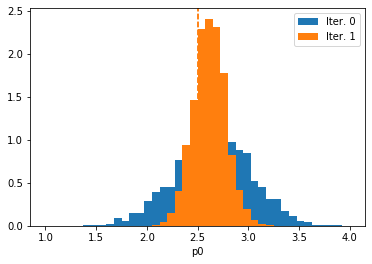

In [5]:
_, ax = plt.subplots()
for t in range(0, h.max_t + 1):
    pyabc.visualization.plot_histogram_1d(
        h, t=t, x="p0", xmin=1, xmax=4, ax=ax,
        refval=p_true, label=f"Iter. {t}", bins=40)
plt.legend()

In [6]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = pyabc.IndependentNormalKernel(var=np.array(std**2), pdf_max=-14)

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor, eps=temperature, population_size=1000)
h_incorrect2 = abc.new("sqlite:///h_incorrect2.db", data)
h_incorrect2 = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-21 12:35:19.417416, end_time=None)>
DEBUG:Acceptor:pdf_norm=-1.4000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 8.94023023508618.
DEBUG:Acceptor:Encountered pd=-1.0275e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3244e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0805e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3832e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2416e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2794e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0445e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0283e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3262e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2692e+01 

DEBUG:Acceptor:Encountered pd=-1.2452e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1736e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1481e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0341e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1438e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2517e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2372e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3611e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0951e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3112e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0281e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0286e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0496e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0657e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1321e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0451e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0628e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3710e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0313e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3972e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2177e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1171e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1954e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0330e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2487e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3249e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0477e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3946e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3569e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2149e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2397e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1207e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1461e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2578e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1082e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0327e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1037e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2357e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1327e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1803e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0282e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2662e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2984e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2984e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0287e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0411e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1316e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1851e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0437e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2471e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1253e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1055e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1475e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0482e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3863e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0791e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1129e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1826e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2287e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3128e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0547e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2751e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2807e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3167e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1409e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0329e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2310e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2886e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2164e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3369e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2524e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2196e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0862e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2841e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3137e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0413e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2221e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1042e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3759e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1815e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0401e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2179e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2974e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1049e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2556e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3082e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0689e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1343e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0769e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2288e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3538e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0308e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1998e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0558e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2611e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0325e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0995e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1657e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2327e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1659e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0881e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2433e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0399e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2334e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1198e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1070e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2877e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0608e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1351e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0307e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0865e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1869e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0581e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0464e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1712e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0989e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0337e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2730e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0760e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1718e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0498e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2442e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1372e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0713e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1056e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1847e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0674e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0363e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0492e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1755e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0465e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0910e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0348e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2181e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1893e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0314e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2944e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0341e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0609e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0277e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2774e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1442e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0376e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0637e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0392e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3072e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2120e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3576e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2670e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.3972e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0289e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0584e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0827e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2897e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.2661e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2972e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1313e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0764e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0363e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1115e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.2731e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1883e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1146e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0731e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0863e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1828e+01 > c=-1.4000e+01, thus weight=1.0000e+00.
DEBU

In [10]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = pyabc.IndependentNormalKernel(var=np.array(std**2), pdf_max=-12)

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor, eps=temperature, population_size=1000)
h_incorrect3 = abc.new("sqlite:///h_incorrect3.db", data)
h_incorrect3 = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-21 12:40:04.020327, end_time=None)>
DEBUG:Acceptor:pdf_norm=-1.2000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 10.182129798629196.
DEBUG:Acceptor:Encountered pd=-1.0468e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0648e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1183e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1417e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0326e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1891e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0326e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0750e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1527e+0

DEBUG:Acceptor:Encountered pd=-1.0959e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1151e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0414e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0851e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0813e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0308e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0311e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1487e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1443e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1103e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1163e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1409e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0527e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0851e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0618e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0523e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1677e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0702e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1542e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1804e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0382e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0983e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0318e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0813e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0841e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0275e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0382e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1307e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0347e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0549e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0768e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0757e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0802e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0784e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1070e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1686e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0276e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0628e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0406e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0371e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0300e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0452e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0344e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0862e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1093e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 1000 / 3452 = 2.8969e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-1.2000e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [1.0, 7.867858832968668].
INFO:ABC:t: 1, eps: 1.0.
DEBUG:Acceptor:Encountered pd=-1.0293e+01 > c=-1.200

DEBUG:Acceptor:Encountered pd=-1.0848e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0739e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1172e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0306e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0834e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1718e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1735e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0774e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0468e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1584e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0341e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0291e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1469e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0352e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0275e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1010e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0283e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0580e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1310e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0383e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0353e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1092e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0533e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0789e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.1974e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1740e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1015e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1057e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1421e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1290e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1840e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0398e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1966e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0874e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0634e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0290e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0350e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0863e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0589e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1667e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1029e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0611e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0556e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0998e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0280e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0395e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0290e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0284e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0414e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0884e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0533e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0406e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0945e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0368e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1111e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0306e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1630e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0861e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0747e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0279e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0389e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0822e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1496e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1097e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0285e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0899e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1156e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1951e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0871e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0430e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0784e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1536e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0498e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0856e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0904e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1733e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0918e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1545e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1630e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0657e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1993e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0319e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1487e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1649e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

DEBUG:Acceptor:Encountered pd=-1.0367e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1281e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1428e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0486e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0516e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0380e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0292e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0727e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0396e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0362e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.1383e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-1.0611e+01 > c=-1.2000e+01, thus weight=1.0000e+00.
DEBU

In [7]:
def normal_dty(y, p0):
    return np.prod(
        1 / np.sqrt(2*np.pi*std**2) * np.exp(-(y-p0)**2/std**2 / 2))

uniform_pd = 1 / (limits_uvar['p0'][1] - limits_uvar['p0'][0])

def posterior_unscaled(p0):
    def uniform_dty(p0):
        if p0 < limits_uvar['p0'][0] or p0 > limits_uvar['p0'][1]:
            return 0
        return uniform_pd
    return normal_dty(data['y0'], p0) * uniform_dty(p0)

def get_posterior_scaled():
    total = sp.integrate.quad(
        lambda p0: posterior_unscaled(p0), limits['p0'][0], limits['p0'][1]
    )
    return lambda p0: posterior_unscaled(p0) / total[0]

posterior = get_posterior_scaled()

p0s = np.linspace(1, 4, 100)
vals = [posterior(p0) for p0 in p0s]

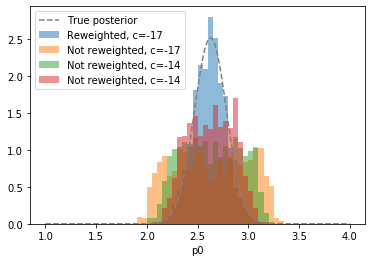

In [8]:
fig, ax = plt.subplots()
pyabc.visualization.plot_histogram_1d(h, t=h.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, bins=40, alpha=0.5, label="Reweighted, c=-17")
pyabc.visualization.plot_histogram_1d(h_incorrect, t=h_incorrect.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, bins=40, alpha=0.5, label="Not reweighted, c=-17")
pyabc.visualization.plot_histogram_1d(h_incorrect2, t=h_incorrect2.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, bins=40, alpha=0.5, label="Not reweighted, c=-14")
pyabc.visualization.plot_histogram_1d(h_incorrect3, t=h_incorrect3.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, bins=40, alpha=0.5, label="Not reweighted, c=-14")
plt.plot(p0s, vals, '--', label="True posterior", color='grey')
plt.legend()

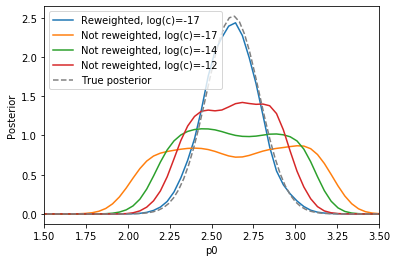

In [10]:
h = pyabc.History("sqlite:///h.db")
h_incorrect = pyabc.History("sqlite:///h_incorrect.db")
h_incorrect2 = pyabc.History("sqlite:///h_incorrect2.db")
h_incorrect3 = pyabc.History("sqlite:///h_incorrect3.db")

fig, ax = plt.subplots()
pyabc.visualization.plot_kde_1d_highlevel(h, t=h.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, label="Reweighted, log(c)=-17")
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=h_incorrect.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, label="Not reweighted, log(c)=-17")
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect2, t=h_incorrect2.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, label="Not reweighted, log(c)=-14")
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect3, t=h_incorrect3.max_t, x="p0", xmin=1.5, xmax=3.5, ax=ax, label="Not reweighted, log(c)=-12")
plt.plot(p0s, vals, '--', label="True posterior", color='grey')
plt.legend()
plt.gcf().set_size_inches(((6, 4)))
plt.savefig("fixed_c.svg", format='svg')